In [3]:
# Importar librerias

%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi

!pip install windrose

In [4]:
from windrose import WindroseAxes

In [9]:
# Importar los datos del archivo original

df = pd.read_csv ('/workspaces/ml-bootcamp-labs/data/raw/DATOS_DIAGRAMA_ROSA_UNIFICADO.csv', sep=";")

df

,wellName,datasetName,TDEP-ft,AvgCali-in,Azimuth-dega,Dip_dega,Hdev-rad,Type
0,CARDALES_1N,Dip_RV2025,5597.881041,8.404510,278.102387,10.224834,0.289407,Cross bedding
1,CARDALES_1N,Dip_RV2025,5598.153164,8.404510,278.077698,10.218625,0.289532,Cross bedding
2,CARDALES_1N,Dip_RV2025,5598.464162,8.404695,278.046692,10.209772,0.289706,Cross bedding
3,CARDALES_1N,Dip_RV2025,5598.794598,8.431867,265.157349,10.711173,0.289931,Cross bedding
4,CARDALES_1N,Dip_RV2025,5599.183345,8.464289,275.912720,10.105380,0.290214,Cross bedding
...,...,...,...,...,...,...,...,...
48974,LLANITO-108,Dip_RV_2025,7616.747529,8.574390,275.352600,16.879814,2.537535,Partially Open Fracture
48975,LLANITO-108,Dip_RV_2025,7617.441192,8.656302,120.125382,56.125763,2.529063,Partially Open Fracture
48976,LLANITO-108,Dip_RV_2025,7617.915804,8.789598,119.805710,61.755463,2.493700,Partially Open Fracture
48977,LLANITO-108,Dip_RV_2025,7618.536449,9.150641,131.377533,47.802986,2.507051,Partially Open Fracture


In [12]:
# Generamos un grafico de puntos Dip x vs. Dip y

# df['DIP_x'] = df['Dip_dega'] * np.sin(df['Azimuth-dega'] * pi / 180.0)
# df['DIP_y'] = df['Dip_dega'] * np.cos(df['Azimuth-dega'] * pi / 180.0)
# fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
# x0, x1 = ax.get_xlim()
# y0, y1 = ax.get_ylim()
# ax.set_aspect('equal')
#_ = df.plot(kind='scatter', x='DIP_x', y='DIP_y', alpha=0.35, ax=ax)

In [19]:
print(df.columns.tolist())

['wellName', 'datasetName', 'TDEP-ft', 'AvgCali-in', 'Azimuth-dega', 'Dip_dega', 'Hdev-rad', 'Type', 'DIP_x', 'DIP_y']


In [15]:
# --- Parámetros de filtro ---
pozo = 'CARDALES_1N'   # Nombre del pozo
prof_min, prof_max = 5590, 5650  # Rango de profundidad (ft)


In [20]:
# Filtrar por pozo y rango de profundidad
df_filtrado = df[
    (df['wellName'] == pozo) &
    (df['TDEP-ft'] >= prof_min) &
    (df['TDEP-ft'] <= prof_max)
    ]

In [21]:
# Verificar cuántos datos quedaron
print(f'Datos encontrados: {len(df_filtrado)} filas')

Datos encontrados: 55 filas


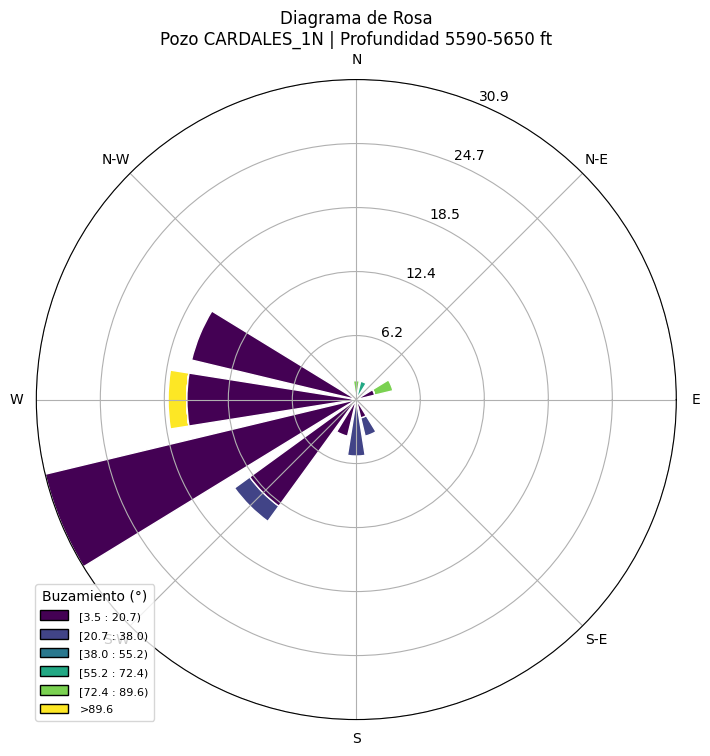

In [24]:
# Graficar si hay datos
if not df_filtrado.empty:
    fig = plt.figure(figsize=(8, 8))
    ax = WindroseAxes.from_ax(fig=fig)
    ax.bar(
        df_filtrado['Azimuth-dega'],
        df_filtrado['Dip_dega'],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )
    ax.set_legend(title='Buzamiento (°)')
    plt.title(f'Diagrama de Rosa\nPozo {pozo} | Profundidad {prof_min}-{prof_max} ft')
    plt.show()
else:
    print('No hay datos que cumplan con el filtro.')

In [26]:
pip install mplstereonet


Note: you may need to restart the kernel to use updated packages.


In [28]:
print(df.columns.tolist())


['wellName', 'datasetName', 'TDEP-ft', 'AvgCali-in', 'Azimuth-dega', 'Dip_dega', 'Hdev-rad', 'Type', 'DIP_x', 'DIP_y']


In [27]:
import mplstereonet as st

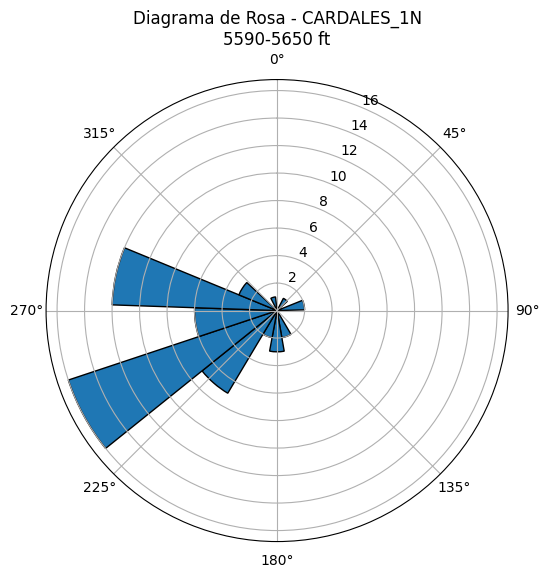

In [30]:
# Cargar datos
df = pd.read_csv('/workspaces/ml-bootcamp-labs/data/raw/DATOS_DIAGRAMA_ROSA_UNIFICADO.csv', sep=';')

# Filtrar por pozo y profundidad
pozo = 'CARDALES_1N'
prof_min, prof_max = 5590, 5650
df_f = df[(df['wellName'] == pozo) &
          (df['TDEP-ft'] >= prof_min) &
          (df['TDEP-ft'] <= prof_max)]

# Convertir rumbo a radianes
trend = np.deg2rad(df_f['Azimuth-dega'])

# Crear histograma polar tipo rosa
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='polar')

# Histograma
n, bins, patches = ax.hist(trend, bins=16, edgecolor='black')

# Formato
ax.set_theta_zero_location('N')  # Norte arriba
ax.set_theta_direction(-1)       # Sentido horario
ax.set_title(f'Diagrama de Rosa - {pozo}\n{prof_min}-{prof_max} ft')

plt.show()

In [32]:
pip install windrose

Note: you may need to restart the kernel to use updated packages.


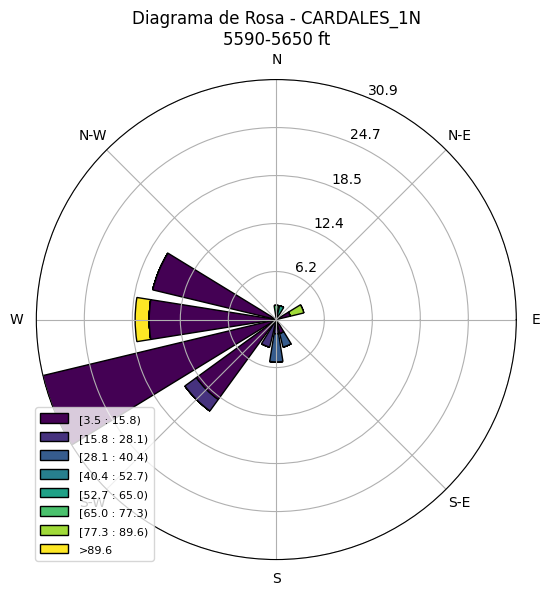

In [33]:
# --- Cargar datos ---
df = pd.read_csv('/workspaces/ml-bootcamp-labs/data/raw/DATOS_DIAGRAMA_ROSA_UNIFICADO.csv', sep=';')

# --- Parámetros de filtrado ---
pozo = 'CARDALES_1N'
prof_min, prof_max = 5590, 5650

# --- Filtrar por pozo y profundidad ---
df_f = df[
    (df['wellName'] == pozo) &
    (df['TDEP-ft'] >= prof_min) &
    (df['TDEP-ft'] <= prof_max)
]

# --- Crear figura y diagrama de rosa ---
fig = plt.figure(figsize=(6, 6))
ax = WindroseAxes.from_ax(fig=fig)

# 'Azimuth_dega' como dirección y 'Dip_dega' como magnitud
ax.bar(
    df_f['Azimuth-dega'],
    df_f['Dip_dega'],
    bins=8,
    normed=True,
    opening=0.8,
    edgecolor='black'
)

# --- Formato ---
ax.set_legend()
plt.title(f'Diagrama de Rosa - {pozo}\n{prof_min}-{prof_max} ft')
plt.show()